## Imports

In [ ]:
!pip install ultralytics

In [ ]:
!pip install supervision==0.2.0

In [3]:
import ultralytics
import supervision as sv
import numpy as np

from ultralytics import YOLO
from IPython import display

In [4]:
ultralytics.checks()
print("supervision", sv.__version__)

Ultralytics YOLOv8.0.20  Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 4096MiB)
Setup complete  (16 CPUs, 15.8 GB RAM, 53.3/68.4 GB disk)


supervision 0.2.0


## Detecting Objects Using YoloV8

In [5]:
VEHICLE_VIDEO_PATH = './vehicle.mp4' 

In [6]:
sv.VideoInfo.from_video_path(VEHICLE_VIDEO_PATH)

VideoInfo(width=3840, height=2160, fps=25, total_frames=538)

In [7]:
model = YOLO('yolov8x.pt')

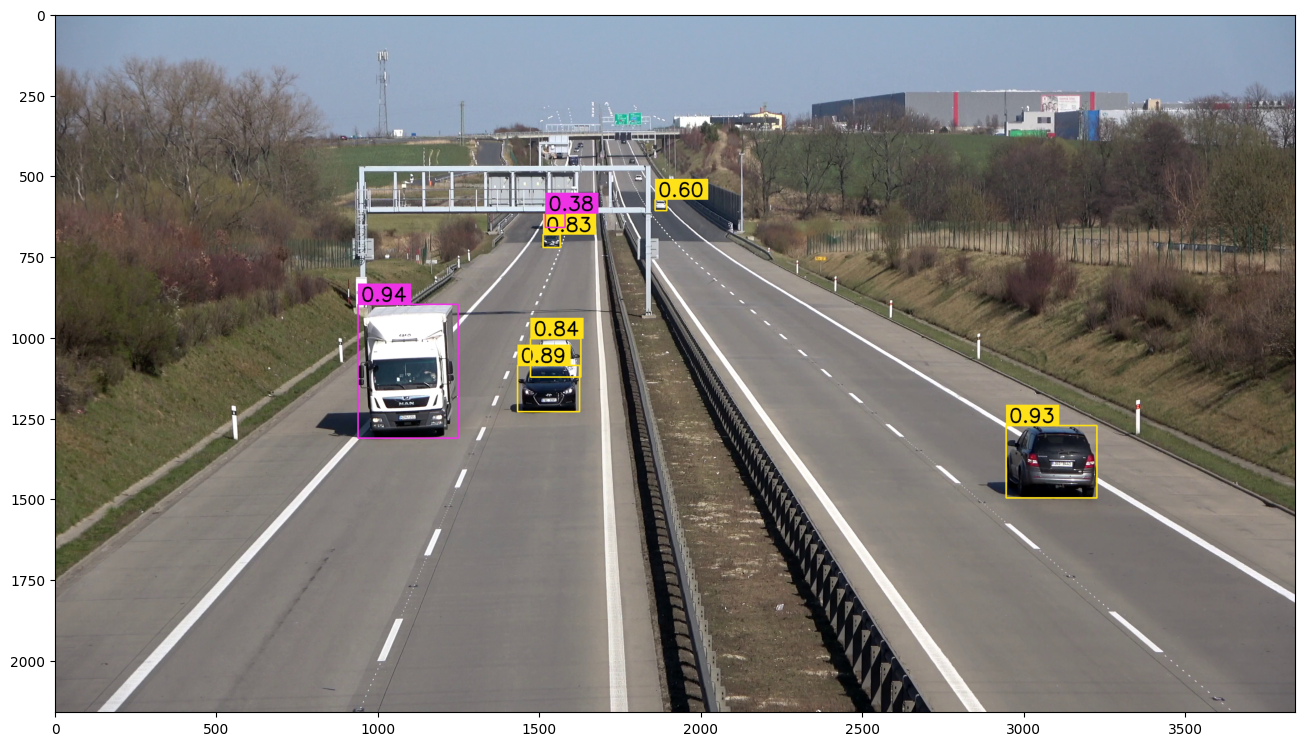

In [18]:
# extract video frame
generator = sv.get_video_frames_generator(VEHICLE_VIDEO_PATH)
iterator = iter(generator)
frame = next(iterator)

# detect
results = model(frame, imgsz=1280)[0]
detections = sv.Detections.from_yolov8(results)

# annotate
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
frame = box_annotator.annotate(scene=frame, detections=detections)

%matplotlib inline  
sv.show_frame_in_notebook(frame, (16, 16))

## Detecting and Counting Objects in Zone

In [19]:
CLASS_NAMES_DICT = model.model.names
print(CLASS_NAMES_DICT)
CLASS_ID = [2, 3, 5, 7]

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

[ True  True  True  True  True  True  True]


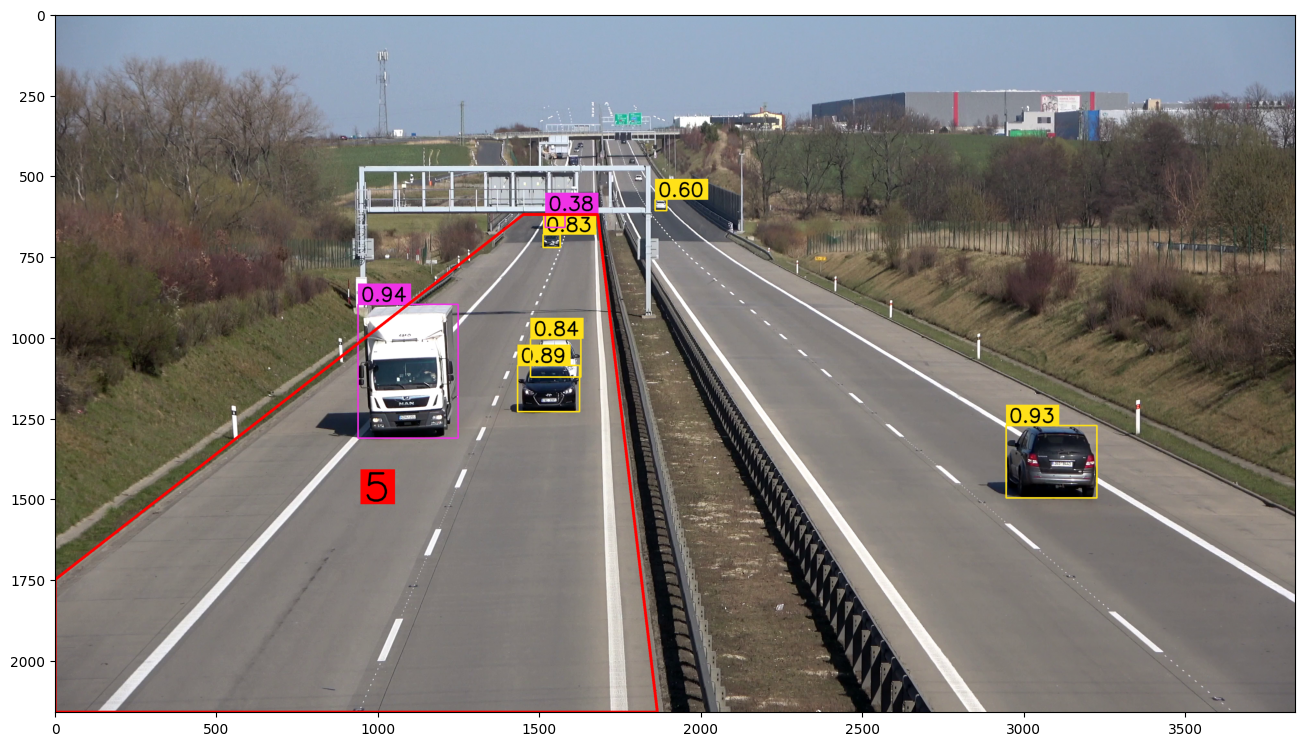

In [20]:
polygon = np.array([
    [0, 1750],
    [0, 2160],
    [1865, 2160],
    [1680, 620],
    [1450, 620]
])
video_info = sv.VideoInfo.from_video_path(VEHICLE_VIDEO_PATH)
zone = sv.PolygonZone(polygon=polygon, frame_resolution_wh=video_info.resolution_wh)

box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
zone_annotator = sv.PolygonZoneAnnotator(zone=zone, color=sv.Color.red(), thickness=8, text_thickness=6, text_scale=4)

generator = sv.get_video_frames_generator(VEHICLE_VIDEO_PATH)
iterator = iter(generator)
frame = next(iterator)

results = model(frame, imgsz=1280)[0]
detections = sv.Detections.from_yolov8(results)
detections = detections[np.isin(detections.class_id, CLASS_ID)]
print(np.isin(detections.class_id, CLASS_ID))
zone.trigger(detections=detections)

box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
labels = [f"{model.names[class_id]} {confidence:0.2f}" for _, confidence, class_id, _ in detections]
frame = box_annotator.annotate(scene=frame, detections=detections)
frame = zone_annotator.annotate(scene=frame)

%matplotlib inline  
sv.show_frame_in_notebook(frame, (16, 16))

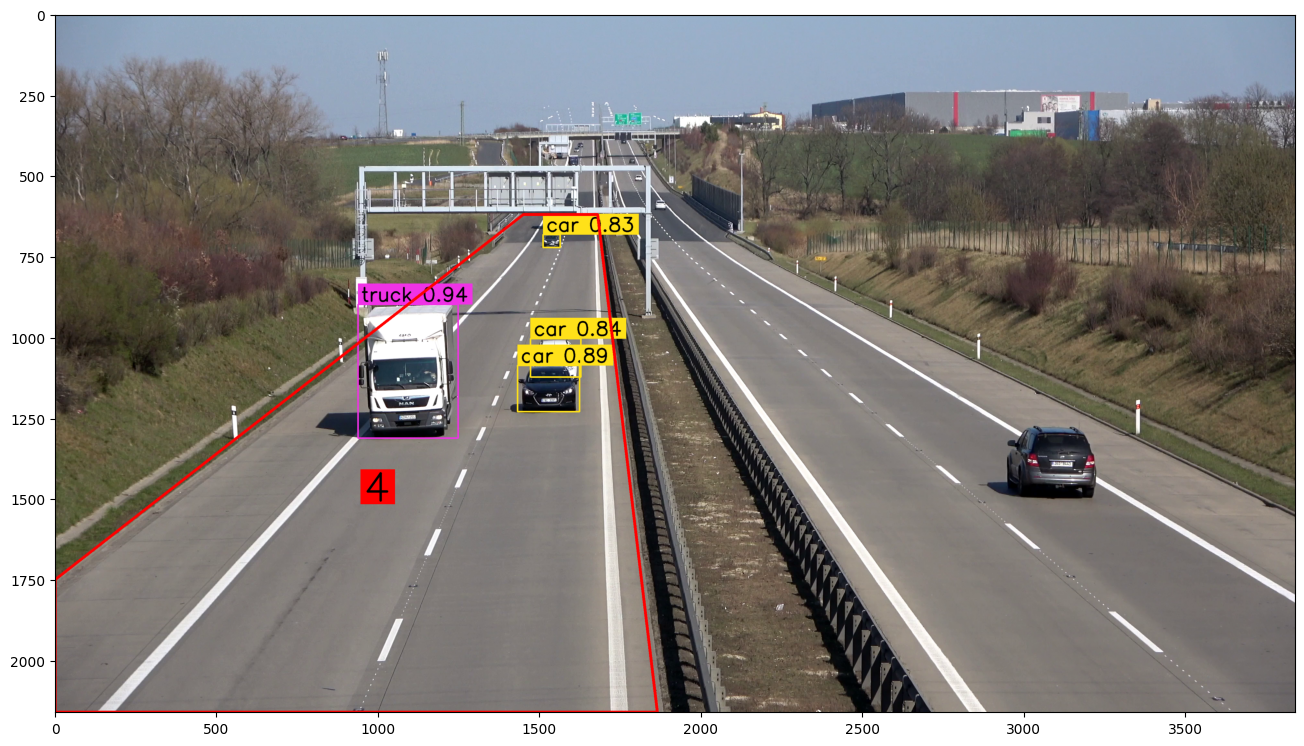

In [28]:
polygon = np.array([
    [0, 1750],
    [0, 2160],
    [1865, 2160],
    [1680, 620],
    [1450, 620]
])
video_info = sv.VideoInfo.from_video_path(VEHICLE_VIDEO_PATH)
zone = sv.PolygonZone(polygon=polygon, frame_resolution_wh=video_info.resolution_wh)


box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
zone_annotator = sv.PolygonZoneAnnotator(zone=zone, color=sv.Color.red(), thickness=8, text_thickness=6, text_scale=4)

generator = sv.get_video_frames_generator(VEHICLE_VIDEO_PATH)
iterator = iter(generator)
frame = next(iterator)

results = model(frame, imgsz=1280)[0]
detections = sv.Detections.from_yolov8(results)
detections = detections[np.isin(detections.class_id, CLASS_ID) & (detections.confidence > 0.5)]
mask = zone.trigger(detections=detections)
detections = detections[mask]

box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
labels = [f"{model.names[class_id]} {confidence:0.2f}" for _, confidence, class_id, _ in detections]
frame = box_annotator.annotate(scene=frame, detections=detections, labels=labels)
frame = zone_annotator.annotate(scene=frame)

%matplotlib inline  
sv.show_frame_in_notebook(frame, (16, 16))

In [29]:
polygon = np.array([
    [0, 1750],
    [0, 2160],
    [1865, 2160],
    [1680, 620],
    [1450, 620]
])

video_info = sv.VideoInfo.from_video_path(VEHICLE_VIDEO_PATH)
zone = sv.PolygonZone(polygon=polygon, frame_resolution_wh=video_info.resolution_wh)

box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
zone_annotator = sv.PolygonZoneAnnotator(zone=zone, color=sv.Color.red(), thickness=6, text_thickness=6, text_scale=4)

def process_frame(frame: np.ndarray, _) -> np.ndarray:
    results = model(frame, imgsz=1280)[0]
    detections = sv.Detections.from_yolov8(results)
    
    detections = detections[np.isin(detections.class_id, CLASS_ID) & (detections.confidence > 0.5)]
    mask = zone.trigger(detections=detections)
    detections = detections[mask]

    box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
    labels = [f"{model.names[class_id]} {confidence:0.2f}" for _, confidence, class_id, _ in detections]
    frame = box_annotator.annotate(scene=frame, detections=detections, labels=labels)
    frame = zone_annotator.annotate(scene=frame)

    return frame

sv.process_video(source_path=VEHICLE_VIDEO_PATH, target_path=f"./vehicle-result.mp4", callback=process_frame)

display.clear_output()

## Detecting and Counting Objects in Multiple Zones

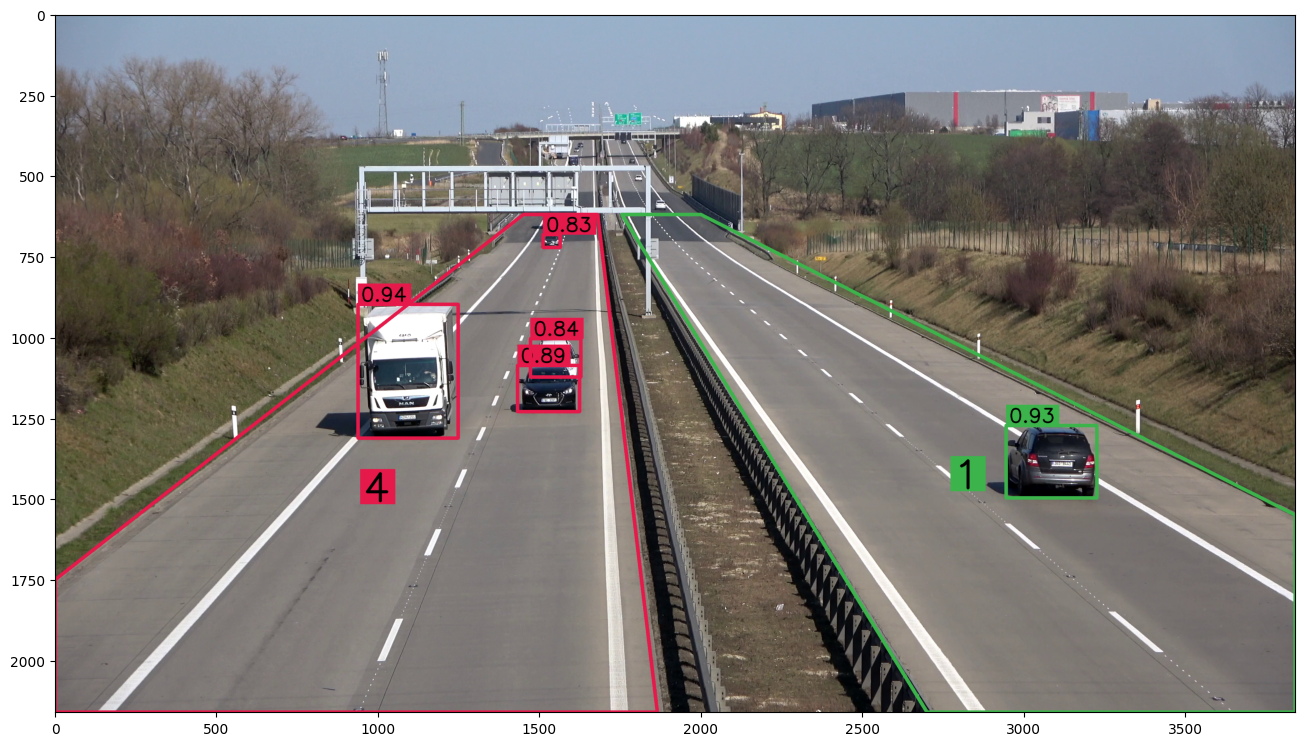

In [13]:
colors = sv.ColorPalette.default()

polygons = [
    np.array([
        [0, 1750],
        [0, 2160],
        [1865, 2160],
        [1680, 620],
        [1450, 620]
    ]),
    np.array([
        [2700, 2160],
        [3840, 2160],
        [3840, 1550],
        [2000, 620],
        [1755, 620]
    ])
]

video_info = sv.VideoInfo.from_video_path(VEHICLE_VIDEO_PATH)

zones = [
    sv.PolygonZone(
        polygon=polygon, 
        frame_resolution_wh=video_info.resolution_wh
    )
    for polygon
    in polygons
]

zone_annotators = [
    sv.PolygonZoneAnnotator(
        zone=zone, 
        color=colors.by_idx(index), 
        thickness=10,
        text_thickness=8,
        text_scale=4
    )
    for index, zone
    in enumerate(zones)
]

box_annotators = [
    sv.BoxAnnotator(
        color=colors.by_idx(index), 
        thickness=10, 
        text_thickness=4, 
        text_scale=2
        )
    for index
    in range(len(polygons))
]

generator = sv.get_video_frames_generator(VEHICLE_VIDEO_PATH)
iterator = iter(generator)
frame = next(iterator)

results = model(frame, imgsz=1280)[0]
detections = sv.Detections.from_yolov8(results)
detections = detections[np.isin(detections.class_id, CLASS_ID) & (detections.confidence > 0.5)]

for zone, zone_annotator, box_annotator in zip(zones, zone_annotators, box_annotators):
    mask = zone.trigger(detections=detections)
    detections_filtered = detections[mask]
    frame = box_annotator.annotate(scene=frame, detections=detections_filtered)
    frame = zone_annotator.annotate(scene=frame)


%matplotlib inline  
sv.show_frame_in_notebook(frame, (16, 16))

In [14]:
colors = sv.ColorPalette.default()

polygons = [
    np.array([
        [0, 1750],
        [0, 2160],
        [1865, 2160],
        [1680, 620],
        [1450, 620]
    ]),
    np.array([
        [2700, 2160],
        [3840, 2160],
        [3840, 1550],
        [2000, 620],
        [1755, 620]
    ])
]

video_info = sv.VideoInfo.from_video_path(VEHICLE_VIDEO_PATH)

zones = [
    sv.PolygonZone(
        polygon=polygon, 
        frame_resolution_wh=video_info.resolution_wh
    )
    for polygon
    in polygons
]

zone_annotators = [
    sv.PolygonZoneAnnotator(
        zone=zone, 
        color=colors.by_idx(index), 
        thickness=10,
        text_thickness=8,
        text_scale=4
    )
    for index, zone
    in enumerate(zones)
]

box_annotators = [
    sv.BoxAnnotator(
        color=colors.by_idx(index), 
        thickness=10, 
        text_thickness=4, 
        text_scale=2
        )
    for index
    in range(len(polygons))
]

def process_frame(frame: np.ndarray, _) -> np.ndarray:
    # detect
    results = model(frame, imgsz=1280)[0]
    detections = sv.Detections.from_yolov8(results)
    detections = detections[np.isin(detections.class_id, CLASS_ID) & (detections.confidence > 0.5)]
    
    for zone, zone_annotator, box_annotator in zip(zones, zone_annotators, box_annotators):
        mask = zone.trigger(detections=detections)
        detections_filtered = detections[mask]
        frame = box_annotator.annotate(scene=frame, detections=detections_filtered)
        frame = zone_annotator.annotate(scene=frame)

    return frame

sv.process_video(source_path=VEHICLE_VIDEO_PATH, target_path=f"./multi_zone_vehicle-result.mp4", callback=process_frame)

display.clear_output()